This is a famous or infamous problem using probability theory which can be quite confusing. Here is an attempt at a fully worked out solution that doesn't expect you to have intuition for what is going on.

There are three doors, numbered 1 to 3, one of which has a car behind it and the other have goats behind them, out of which you pick one door. Let us say you pick door 1. This is without loss of generality as what follows would be true for any other choice of door. 

Then Monty opens either door 2 or 3 to reveal a goat.

Suppose - again without loss of generality - that Monty picks door 3. 

You need to decide, given what has taken place, whether to switch to door 2.

Let $X$ be an random variable which can assume values $1,2$, or $3$ depending on the door behind which the car is found. Since the car is equally likely to be behind each door, we have that $P(X = i) = \frac{1}{3}$

What you want to know is, given that:

1.  You have selected door 1
2.  Monty has opened door 3

what are the probabilities that $X=1$ and that $X=2$. Your selection is not a random variable but it is an event on which we need to condition the probabilities. We can regard Monty's selection as a random variable. Suppose that the car is behind door 1, then imagine Monty tossing a coin to pick a door which means he is equally likely to select either of the other two doors. Otherwise, Monty will the other door which has the goat behind it. 

Let $M$ be an random variable which can assume values $1,2$, or $3$ depending on the door opened by Monty. Let $s_i$ where $i \in \{1,2,3\}$ indicate your door selection. 

We want to calculate the following:

$$P(X = 1|M = 3, s_1) \text{ and } P(X = 2|s_1, M = 3, s_1)$$

Using Bayes rule:

$$P(X = i|M = 3, s_1) = \frac{P(M = 3|X = i, s_1)P(X = i, s_1)}{P(M = 3)}$$

Let us consider the different probabilities on the right hand side. $P(X = i, s_1)$ is simple since the fact that you have made a choice of a certain door has no effect on the probabilities that the prize will be behind any of the other doors so that $P(X = i, s_1) = P(X = i) = \frac{1}{3}$. 

What about $P(M = 3|X = i, s_1)$? We need to evaluate this term for $X = 1$ and $X = 2$. Obviously $P(M = 3|X = 3, s_1) = 0$ since Monty won't open a door that has car behind it.

First consider $P(M = 3|X = 1, s_1)$. If $X = 1$ and you have selected this door, then Monty is equally likely to open each of the other doors which means that $P(M = 3|X = 1, s_1) = \frac{1}{2}$. On the other hand if in fact $X = 2$, then Monty is guaranteed to select door 3 so that $P(M = 3|X = 1, s_1) = 1$.

What about the denominator, $P(M = 3|s_1)$. Ok I said I won't rely on intuition but you may well think that, given that there are two other doors and you don't know where the car actually is the probability that Monty picks either of the two doors is the same i.e. that $P(M = 3|s_1) = \frac{1}{2}$.

Let us write this out:

$$P(M =3|s_1) = P(M = 3|X = 1, s_1)P(X = 1, s_1) + P(M = 3|X = 3, s_1)P(X = 3, s_1)\\
= \frac{1}{2}*\frac{1}{3} + 1*\frac{1}{3} = \frac{1}{2}$$  

Now we can find $$P(X = 1|M = 3, s_1) \text{ and } P(X = 2|s_1, M = 3, s_1)$$ as follows:

$$P(X = 1|M = 3, s_1) = \frac{P(M = 3|X = 1, s_1)P(X = 1, s_1)}{P(M = 3)} = \frac{\frac{1}{2}*\frac{1}{3}}{\frac{1}{2}} = \frac{1}{3}$$

$$P(X = 2|M = 3, s_1) = \frac{P(M = 3|X = 2, s_1)P(X = 3, s_1)}{P(M = 3)} = \frac{1*\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}$$

This means that you should switch since you have a better chance of finding the car behind door 2 compared to door 1, given your initial choice and Monty's selection. There was actually no need explicitly to calculate these terms since it is enough to know the ratio of the two probabilities i.e. the odds.
$$\frac{P(M = 3|X = 2, s_1)P(X = 2, s_1)}{P(M = 3|X = 1, s_1)P(X = 1, s_1)}$$

However explicitly writing out $P(M = 3|s_1)$ makes clear the asymmetric contributions of the situations where $X=1$ and $X=2$ - which is key to the non-intuitive result.

The result importantly depends on the fact that the probability that a particular door is opened is affected by the door selected by the contestant as well as the one behind which the prize is found. Suppose Monty had a sudden attack of amnesia and forgot all the rules and just picked a door at random. In that case $P(M = i|X = j, s_k) = \frac{1}{3}$ for all $i,j,k$ which means that $D$ is independent of the choice of door and the prize location i.e. $P(M = i|X = j, s_k) = P(M = i)$.

Suppose however that the selected door - say door 3 - does not contain the prize so we want to know $P(X = i|M = 3, X \neq 3, s_1)$. For $i \in \{1,2\}$ it turns out be:

$$P(X = i|M = 3, X \neq 3, s_1) = \frac{P(M = 3|X = i, X \neq 3, s_1)P(X = i| X \neq 3, s_1)}{P(M = 3|X \neq 3, s_1)}$$

Since $M$ does not depend on the contestant's choice or prize location $P(M = 3|X = i, X \neq 3, s_1) = P(M = 3|X = i, s_1) = P(M = 3) = \frac{1}{3}$. Thus $P(X = i|M = 3, X \neq 3, s_1) = P(X = i| X \neq 3, s_1) = P(X = i| X \neq 3) = \frac{1}{2}$ since now the prize is equally likely to be behind either of the two doors. 

Thus:

$$P(X = 1|M = 3, X \neq 3, s_1) = P(X = 2|M = 3, X \neq 3, s_1) = \frac{1}{2}$$

which means that there is no advantage to switching.


Let us see this in simulation:

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
num_trials = np.logspace(2,5,100)

In [37]:
#The original problem
means = []

for i in num_trials:
    locs = np.random.randint(1,4,int(i))
    choices = np.array([np.random.randint(2,4) if (loc == 1) else (3 - (loc == 3)) for loc in locs])
    means.append(np.mean(locs[np.where(choices == 3)]==2))

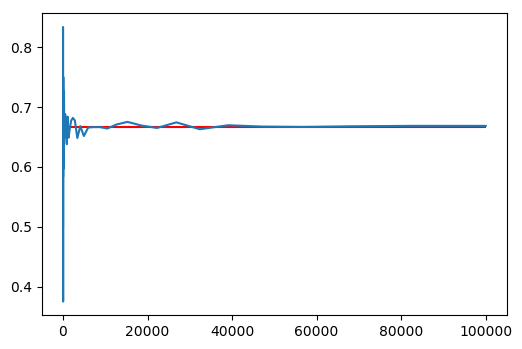

In [38]:
plt.hlines(xmin=0,xmax=100000,y=2./3,color='r')
plt.plot(num_trials, means)

In [39]:
#The original problem
means = []
num_trials = np.logspace(1,5)

for i in num_trials:
    locs = np.random.randint(1,4,int(i))
    choices = np.array([np.random.randint(1,4) for loc in locs])
    locs3 = locs[np.where(choices == 3)]
    valid_locs3 = locs3[np.where(locs3 != 3)]
    means.append(np.mean(valid_locs3 == 2))

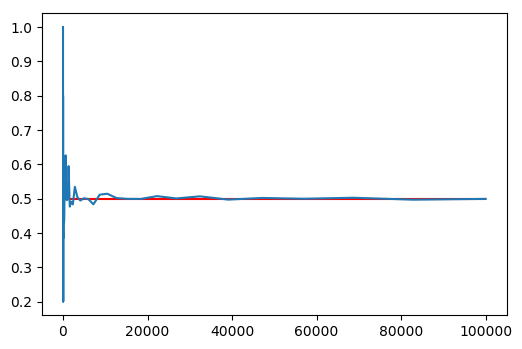

In [40]:
plt.hlines(xmin=0,xmax=100000,y=1./2,color='r')
plt.plot(num_trials, means)